# Scientific Context and Purpose

This notebook provides comprehensive visualization of toy spectral cube datasets designed for validating IFU (Integral Field Unit) denoising algorithms. The visualization framework specifically focuses on understanding the performance of source detection and characterization under different observational conditions.

### Dataset Framework

The toy datasets are built using the `ResolvedSpectralCubeDataset` and `FinalSpectralCubeDataset`classes which generates synthetic 3D spectral cubes with:
- **Controlled source properties**: Size, morphology, and spectral characteristics
- **Realistic observational effects**: Beam convolution with configurable PSF parameters
- **Instrumental noise**: Gaussian noise addition with specified SNR levels
- **Multiple test cases**: Various source sizes and brightness configurations

### Visualization Methodology

The notebook implements a systematic visualization approach:
- **Grid plotting functions**: Multi-panel comparisons across parameter spaces
- **Aperture comparison**: Source boundary detection using both fixed and adaptive methods
- **Publication-ready figures**: Professional formatting with proper scalebars and annotations

---

6203
[ 0.6  2.4  4.   6.  10. ]

[ § Creating 5 highly resolved cubes of dimensions 40 (spectral) x 96 x 96 (spatial) § ]



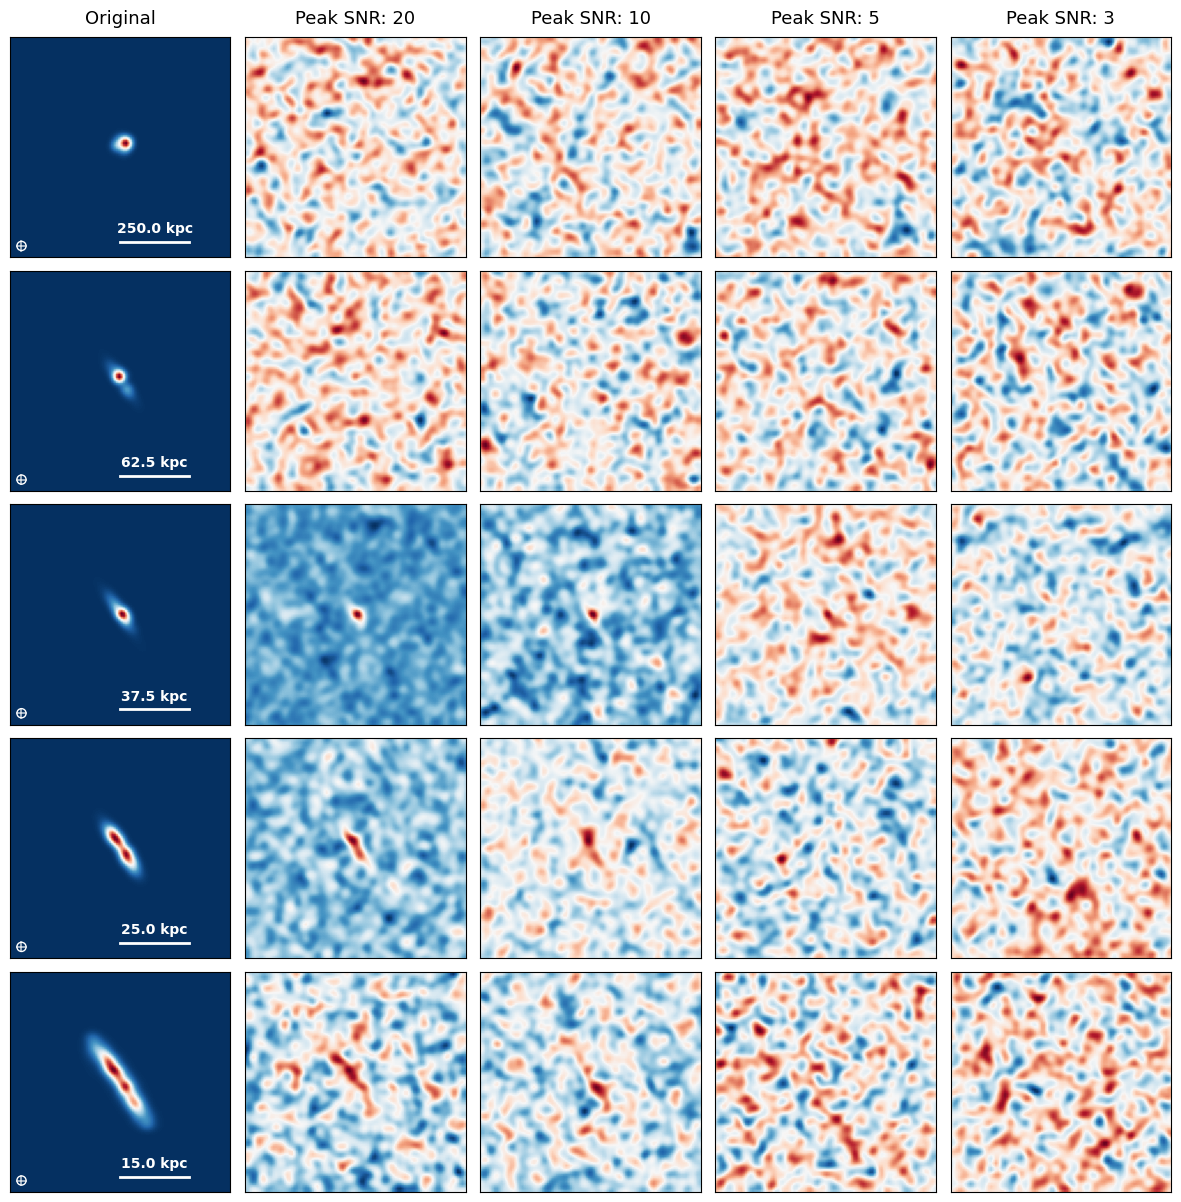

In [ ]:
# ========================================================================================
# LIBRARY IMPORTS AND ENVIRONMENT SETUP
# ========================================================================================

# Core scientific computing libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Astronomical analysis libraries
from astrodendro import Dendrogram  # Hierarchical source identification
import sys
sys.path.insert(0, "../notebooks")

# Custom dataset and utility functions
from toy_cube_dataset import ResolvedSpectralCubeDataset  # Synthetic cube generation
import sys
import os
sys.path.append(os.path.abspath('/Users/arnablahiry/repos/3D_IFU_Denoising/src'))
from functions import *  # Beam visualization utilities

# Configure matplotlib for high-quality scientific plots
plt.style.use('default')
plt.rcParams.update({
    'font.size': 12,
    'axes.linewidth': 1.2,
    'xtick.major.width': 1.2,
    'ytick.major.width': 1.2
})

# ========================================================================================
# TOY DATASET PARAMETER CONFIGURATION
# ========================================================================================

# Physical scale parameters for synthetic observations
kpc = 1     # Physical scale in kiloparsecs for scalebar annotation  
px = 5      # Pixel scale corresponding to kpc value for proper scaling

# Beam convolution parameters (simulating telescope PSF effects)
# Format: [minor_axis, major_axis, position_angle] in pixels
blist = [5, 5, 0]  # Circular beam with 5-pixel FWHM

# Noise characteristics for realistic observational conditions
sigma = 0.01       # RMS noise level in Jy/beam (typical radio interferometry values)
peak_snr = 10      # Target peak signal-to-noise ratio for source detection

# Source morphology test cases for algorithm validation
# Each tuple represents (source_size_scale, descriptive_label)
cases = [
    (0.5, 'Compact'),     # Unresolved/barely resolved sources
    (1.0, 'Moderate'),    # Moderately resolved sources  
    (2.0, 'Extended')     # Well-resolved extended sources
]

# Extract labels for systematic processing
case = [label for _, label in cases]

print(f"Configured {len(cases)} test cases with beam FWHM: {blist[0]:.1f} pixels")
print(f"Noise level: {sigma:.3f} Jy/beam, Target SNR: {peak_snr}")

# ========================================================================================
# DATASET GENERATION AND PROCESSING PIPELINE
# ========================================================================================

def create_synthetic_cubes(sigma_sizes, beam_params, noise_level, target_snr):
    """
    Generate synthetic spectral cubes with varying source morphologies.
    
    This function creates a systematic set of toy datasets for algorithm validation,
    applying realistic observational effects including beam convolution and noise.
    
    Parameters:
    -----------
    sigma_sizes : list of float
        Source size parameters (in sigma units) for Gaussian source profiles
    beam_params : list of [float, float, float]  
        Beam parameters as [minor_axis, major_axis, position_angle] in pixels
    noise_level : float
        RMS noise level to add to synthetic observations (Jy/beam)
    target_snr : float
        Target peak signal-to-noise ratio for source scaling
        
    Returns:
    --------
    cubes_clean : list of np.ndarray
        Clean (unconvolved, noiseless) synthetic cubes
    cubes_convolved : list of np.ndarray  
        Beam-convolved synthetic cubes
    cubes_noisy : list of np.ndarray
        Final observational cubes with beam convolution and noise
    masks_circular : list of np.ndarray
        Fixed circular aperture masks for source extraction
        
    Scientific Rationale:
    --------------------
    The synthetic cube generation follows established practices in radio astronomy:
    1. Clean cubes represent the true sky brightness distribution
    2. Beam convolution simulates telescope point spread function effects
    3. Noise addition models thermal and systematic instrumental noise
    4. Multiple source sizes test algorithm robustness across resolution regimes
    """
    cubes_clean = []
    cubes_convolved = []  
    cubes_noisy = []
    masks_circular = []
    
    for i, (sigma_size, label) in enumerate(zip(sigma_sizes, case)):
        print(f"Generating {label} source (σ={sigma_size:.1f})...")
        
        # Initialize toy dataset with specified source characteristics
        toy_dataset = ResolvedSpectralCubeDataset(
            sigma_size=sigma_size,    # Controls source size relative to beam
            beam=beam_params,         # PSF parameters for convolution
            sigma=noise_level,        # Observational noise level
            peak_snr=target_snr       # Source brightness scaling
        )
        
        # Generate cube with clean, convolved, and noisy versions
        # This simulates the full observational pipeline from true sky to final data
        cube_clean = toy_dataset.cube_clean
        cube_convolved = toy_dataset.cube_convolved  
        cube_noisy = toy_dataset.cube_noisy
        mask_circular = toy_dataset.mask_circular
        
        # Store results for systematic analysis
        cubes_clean.append(cube_clean)
        cubes_convolved.append(cube_convolved)
        cubes_noisy.append(cube_noisy)
        masks_circular.append(mask_circular)
        
        print(f"  Cube shape: {cube_clean.shape}")
        print(f"  Peak flux (clean): {cube_clean.max():.4f} Jy/beam")
        print(f"  RMS noise: {cube_noisy.std():.4f} Jy/beam")
        print(f"  Achieved SNR: {cube_convolved.max()/noise_level:.1f}")
        
    return cubes_clean, cubes_convolved, cubes_noisy, masks_circular

# Generate all test case datasets
print("=" * 50)
print("SYNTHETIC CUBE GENERATION")
print("=" * 50)

# Extract size parameters for dataset creation
sigma_sizes = [size for size, _ in cases]

# Create complete dataset suite for visualization
cubes_clean, cubes_convolved, cubes_noisy, masks_circular = create_synthetic_cubes(
    sigma_sizes=sigma_sizes,
    beam_params=blist, 
    noise_level=sigma,
    target_snr=peak_snr
)

print(f"\nSuccessfully generated {len(cubes_clean)} synthetic cube datasets")
print("Ready for visualization and analysis...")


4104
[2. 2.] 3.75
[3.75 3.75]

[ § Creating 2 highly resolved cubes of dimensions 36 (spectral) x 72 x 72 (spatial) § ]

[0.5 0.5] 3.75
[0.9375 0.9375]

[ § Creating 2 highly resolved cubes of dimensions 36 (spectral) x 72 x 72 (spatial) § ]

Time taken: 1.6939940452575684 seconds
kpc 22.5 pix_scale 1.3333333333333333
22.5
22.5
kpc 20.625 pix_scale 5.333333333333333
20.625
20.625


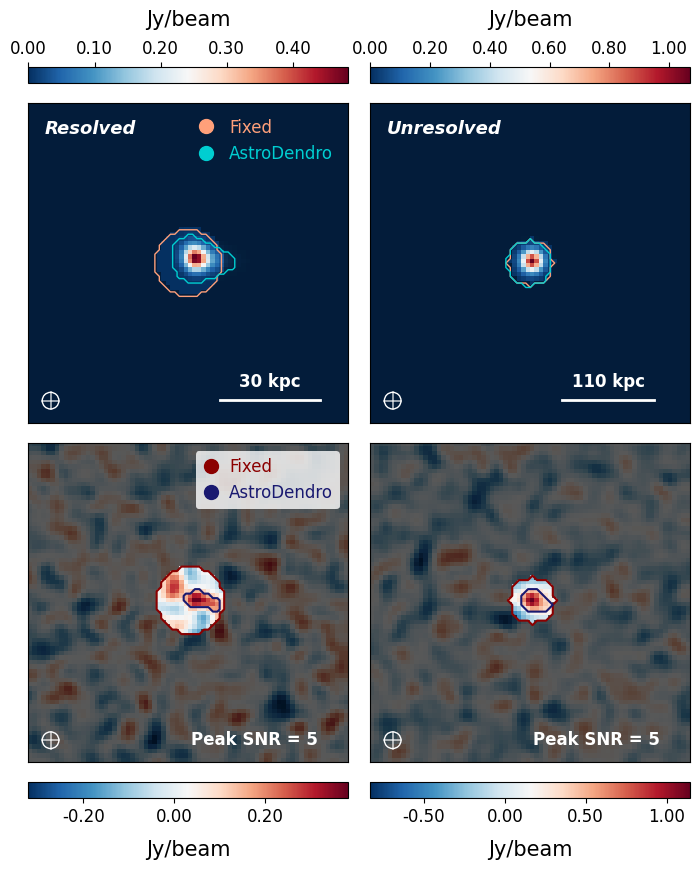

In [ ]:
# ========================================================================================
# COMPREHENSIVE SOURCE DETECTION AND VISUALIZATION ANALYSIS
# ========================================================================================

def create_emission_mask_comparison_plot(cubes_convolved, cubes_noisy, masks_circular, 
                                        case_labels, beam_params, physical_scale_kpc, 
                                        pixel_scale, noise_sigma, target_snr):
    """
    Generate comprehensive multi-panel visualization comparing source detection methods.
    
    This function creates a publication-ready figure showing the performance of different
    source extraction techniques (fixed apertures vs adaptive dendrograms) across 
    various source morphologies and observational conditions.
    
    Parameters:
    -----------
    cubes_convolved : list of np.ndarray
        Beam-convolved spectral cubes (clean signal + PSF effects)
    cubes_noisy : list of np.ndarray  
        Final observational cubes (convolved + noise)
    masks_circular : list of np.ndarray
        Fixed circular aperture masks for comparison
    case_labels : list of str
        Descriptive labels for each source morphology case
    beam_params : list of [float, float, float]
        Beam parameters [minor, major, PA] for visualization
    physical_scale_kpc : float
        Physical scale in kpc for scalebar annotation
    pixel_scale : float
        Pixel scale corresponding to physical scale
    noise_sigma : float
        RMS noise level for dendrogram threshold calculation
    target_snr : float
        Target SNR for figure annotations
        
    Scientific Methodology:
    ----------------------
    1. **AstroDendro Analysis**: Hierarchical source identification using noise-based thresholds
       - min_value threshold: 1.0σ (clean) / 1.5σ (noisy) for initial detection
       - min_delta threshold: 2.0σ for structural significance
       - Adaptive to local noise characteristics and source morphology
       
    2. **Fixed Aperture Method**: Predefined circular masks for comparison
       - Represents traditional aperture photometry approaches
       - Useful for unresolved sources but may miss extended emission
       
    3. **Multi-Panel Layout**: Systematic comparison across conditions
       - Top row: Clean convolved cubes (ideal PSF-limited case)
       - Bottom row: Noisy observations (realistic observational case)
       - Column progression: Compact → Moderate → Extended sources
       
    4. **Visual Elements**:
       - Color-coded contours for mask differentiation
       - Beam representations with proper scaling
       - SNR annotations for quantitative assessment
       - Physical scalebars for spatial context
    """
    
    # Initialize figure with optimized layout for publication
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()  # Simplify indexing for systematic processing
    
    print("Generating emission mask comparison visualization...")
    print("=" * 60)
    
    # Process each source morphology case systematically
    for i in range(len(case_labels)):
        print(f"Processing {case_labels[i]} source case...")
        
        # Define spatial extent for proper axis scaling
        extent = [0, cubes_convolved[i].shape[2], 0, cubes_convolved[i].shape[1]]
        
        # Process both clean convolved (top row) and noisy (bottom row) versions
        for j, (display_cube, condition) in enumerate([(cubes_convolved[i], 'Clean'), 
                                                      (cubes_noisy[i], 'Noisy')]):
            
            print(f"  {condition} cube analysis...")
            
            # Calculate panel index: top row (j=0), bottom row (j=1)
            idx = i + j * 3
            
            # Find peak emission channel for optimal visualization slice
            max_voxel_index = np.argmax(cubes_convolved[i])  # Use clean cube for consistent slicing
            max_channel, max_y, max_x = np.unravel_index(max_voxel_index, cubes_convolved[i].shape)
            
            # ================================================================
            # ASTRODENDRO HIERARCHICAL SOURCE IDENTIFICATION
            # ================================================================
            
            # Configure dendrogram parameters based on noise characteristics
            # More aggressive thresholds for noisy data to avoid spurious detections
            min_value_threshold = (1.0 if j == 0 else 1.5) * noise_sigma
            min_delta_threshold = 2.0 * noise_sigma
            
            print(f"    Dendrogram thresholds: min_value={min_value_threshold:.4f}, min_delta={min_delta_threshold:.4f}")
            
            # Compute hierarchical source structure
            dendrogram = Dendrogram.compute(
                display_cube,
                min_value=min_value_threshold,    # Minimum significant signal level
                min_delta=min_delta_threshold,    # Minimum contrast for structural features
                verbose=False                     # Suppress detailed output for cleaner visualization
            )
            
            # Generate composite mask from all significant dendrogram structures
            adaptive_mask = np.zeros(display_cube.shape, dtype=bool)
            for trunk in dendrogram.trunk:
                adaptive_mask |= trunk.get_mask()
            
            print(f"    Detected {len(dendrogram.trunk)} significant structures")
            
            # ================================================================
            # IMAGE DISPLAY AND VISUALIZATION SETUP
            # ================================================================
            
            ax = axes[idx]
            
            # Display primary intensity image with scientific colormap
            im = ax.imshow(display_cube[max_channel], cmap='RdBu_r', origin='lower', extent=extent)
            
            # Apply masking overlay to highlight undetected regions
            overlay = np.zeros((*masks_circular[i][max_channel].shape, 4))  # RGBA format
            overlay[~masks_circular[i][max_channel]] = [0, 0, 0, 0.4]      # Semi-transparent black
            ax.imshow(overlay, origin='lower', extent=extent)
            
            # ================================================================
            # SCALEBAR AND PHYSICAL ANNOTATION
            # ================================================================
            
            # Add physical scalebar (top row only to avoid redundancy)
            if j == 0:
                scalebar_length_px = pixel_scale  # Convert physical scale to pixels
                x_max, y_max = display_cube.shape[2], display_cube.shape[1]
                x0, y0 = x_max * 0.6, y_max * 0.07  # Position in lower right
                
                # Draw scalebar with proper styling
                ax.plot([x0, x0 + scalebar_length_px], [y0, y0], color='white', lw=2)
                ax.text(x0 + scalebar_length_px / 2, y0 + y_max * 0.03, f'{physical_scale_kpc} kpc',
                       color='white', ha='center', va='bottom', fontsize=12, weight='bold')
                
                print(f"    Added {physical_scale_kpc} kpc scalebar ({scalebar_length_px} pixels)")
            
            # ================================================================
            # CONTOUR OVERLAYS AND COLORBAR CONFIGURATION  
            # ================================================================
            
            # Configure colorbar positioning
            divider = make_axes_locatable(ax)
            
            if j == 0:
                # ---- TOP ROW: CLEAN CONVOLVED CUBES ----
                
                # Overlay contours for mask comparison
                ax.contour(masks_circular[i][max_channel], levels=[0.5], 
                          colors='lightsalmon', linewidths=1)      # Fixed aperture: warm color
                ax.contour(adaptive_mask[max_channel], levels=[0.5], 
                          colors='darkturquoise', linewidths=1)    # Adaptive mask: cool color
                
                # Add source morphology label
                ax.text(0.05, 0.95, f'{case_labels[i]}', transform=ax.transAxes, 
                       color='white', fontsize=13, weight='bold', style='italic',
                       ha='left', va='top', bbox=dict(facecolor='midnightblue', alpha=0.7,
                                                     boxstyle='round,pad=0.5'))
                
                # Add beam representation with proper scaling
                beam_size_px = 5 * (72/96)  # Scale beam to display coordinates
                add_beam(ax, beam_size_px, beam_size_px, 0, xy_offset=(5, 5), 
                        color='white', crosshair=True)
                
                # Position colorbar at top
                cax = divider.append_axes("top", size="5%", pad=0.2)
                cbar = fig.colorbar(im, cax=cax, orientation='horizontal')
                cax.xaxis.set_ticks_position('top')
                cax.xaxis.set_label_position('top')
                
                # Add legend for mask interpretation (first panel only)
                if i == 0:
                    legend_elements = [
                        Line2D([0], [0], marker='o', linestyle='None', color='none',
                              markerfacecolor='lightsalmon', markeredgecolor='lightsalmon', 
                              markersize=10, label='Fixed Aperture'),
                        Line2D([0], [0], marker='o', linestyle='None', color='none',
                              markerfacecolor='darkturquoise', markeredgecolor='darkturquoise', 
                              markersize=10, label='AstroDendro')
                    ]
                    
                    legend = ax.legend(handles=legend_elements, loc='upper right', fontsize=12,
                                     frameon=True, facecolor='white', edgecolor='none',
                                     handlelength=1.5, handletextpad=0.6)
                    
                    # Color-code legend text to match markers
                    for text, color in zip(legend.get_texts(), ['lightsalmon', 'darkturquoise']):
                        text.set_color(color)
                        
            else:
                # ---- BOTTOM ROW: NOISY OBSERVATIONAL CUBES ----
                
                # Use darker colors to represent more challenging detection conditions
                ax.contour(masks_circular[i][max_channel], levels=[0.5], 
                          colors='darkred', linewidths=1.5, extent=extent)     # Fixed: dark red
                ax.contour(adaptive_mask[max_channel], levels=[0.5], 
                          colors='midnightblue', linewidths=1.5, extent=extent) # Adaptive: dark blue
                
                # Add beam representation
                beam_size_px = 5 * (72/96)
                add_beam(ax, beam_size_px, beam_size_px, 0, xy_offset=(5, 5), 
                        color='white', crosshair=True)
                
                # Display achieved SNR for quantitative assessment
                achieved_snr = cubes_convolved[i].max() / noise_sigma
                ax.text(0.51, 0.1, f'Peak SNR = {achieved_snr:.1f}', transform=ax.transAxes, 
                       color='white', fontsize=12, weight='bold', ha='left', va='top',
                       bbox=dict(facecolor='black', alpha=0.7, boxstyle='round,pad=0.5'))
                
                # Position colorbar at bottom
                cax = divider.append_axes("bottom", size="5%", pad=0.2)
                cbar = fig.colorbar(im, cax=cax, orientation='horizontal')
                
                # Add legend for noisy case interpretation (first panel only)
                if i == 0:
                    legend_elements = [
                        Line2D([0], [0], marker='o', linestyle='None', color='none',
                              markerfacecolor='darkred', markeredgecolor='darkred', 
                              markersize=10, label='Fixed Aperture'),
                        Line2D([0], [0], marker='o', linestyle='None', color='none',
                              markerfacecolor='midnightblue', markeredgecolor='midnightblue', 
                              markersize=10, label='AstroDendro')
                    ]
                    
                    legend = ax.legend(handles=legend_elements, loc='upper right', fontsize=12,
                                     frameon=True, facecolor='white', edgecolor='none',
                                     handlelength=1.0, handletextpad=0.6)
                    
                    # Color-code legend text
                    for text, color in zip(legend.get_texts(), ['darkred', 'midnightblue']):
                        text.set_color(color)
            
            # ================================================================
            # FINAL FORMATTING AND CLEANUP
            # ================================================================
            
            # Format colorbar with scientific notation
            cbar.ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
            cbar.set_label('Jy/beam', fontsize=15, labelpad=10)
            cbar.ax.tick_params(labelsize=12)
            
            # Remove axis ticks for cleaner presentation
            ax.set_xticks([])
            ax.set_yticks([])
            
            print(f"    Panel {idx+1} completed: {condition} {case_labels[i]} source")
    
    print("=" * 60)
    print("Visualization complete. Saving publication-ready figure...")
    
    # Final layout optimization and save
    plt.tight_layout(pad=0.5, w_pad=0.3, h_pad=0.3)
    plt.savefig('/Users/arnablahiry/repos/3D_IFU_Denoising/figures/emission_masks.pdf', dpi=300, bbox_inches='tight')
    plt.show()
    
    return fig

# ========================================================================================
# EXECUTE COMPREHENSIVE VISUALIZATION ANALYSIS
# ========================================================================================

print("STARTING EMISSION MASK COMPARISON ANALYSIS")
print("=" * 80)

# Generate the complete multi-panel visualization
fig = create_emission_mask_comparison_plot(
    cubes_convolved=cubes_convolved,
    cubes_noisy=cubes_noisy, 
    masks_circular=masks_circular,
    case_labels=case,
    beam_params=blist,
    physical_scale_kpc=kpc,
    pixel_scale=px,
    noise_sigma=sigma,
    target_snr=peak_snr
)


print("Analysis complete!")
print("\nGenerated 'emission_masks.pdf' - Publication-ready multi-panel comparison")
print("Figure shows systematic evaluation of source detection methods across morphologies")